# Time Series data
# Applications
# Types
# Analysis
 CoDecompositionysis
# Time Series Decomposition
# Splitting
# Simple forecasting models
** Naive**
** orecast Algorithms
# Auto regressive Methods

# Basic Forecasting Techniques

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

### Reading the dataset

In [2]:
data = pd.read_csv('Customers_in_a_Shop.csv')
data

,1949-01,114
0,1949-02,120.0
1,1949-03,134.0
2,1949-04,67.0
3,1949-05,123.0
4,1949-06,137.0
...,...,...
138,1960-08,606.0
139,1960-09,508.0
140,1960-10,720.0
141,1960-11,750.0


In [3]:
data = pd.read_csv('Customers_in_a_Shop.csv',header=None)
data

,0,1
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0
3,1949-04,67.0
4,1949-05,123.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,720.0
142,1960-11,750.0


In [4]:
data.columns = ['Date','Customers']
data

,Date,Customers
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0
3,1949-04,67.0
4,1949-05,123.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,720.0
142,1960-11,750.0


In [5]:
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date')
data

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,720.0


In [6]:
#Shape of the dataset
data.shape

(144, 1)

In [7]:
data.head()

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0


## Missing Values

In [8]:
data.isnull().sum()

Customers    4
dtype: int64

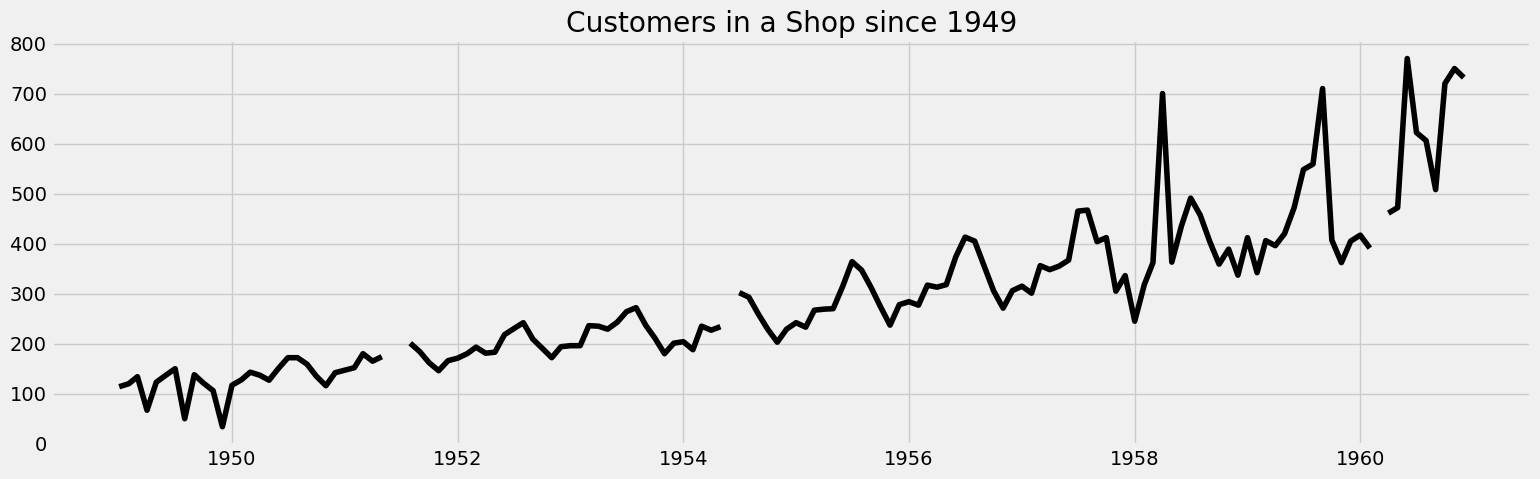

In [9]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='black')
plt.title("Customers in a Shop since 1949")
plt.show()

## Linear Interpolation

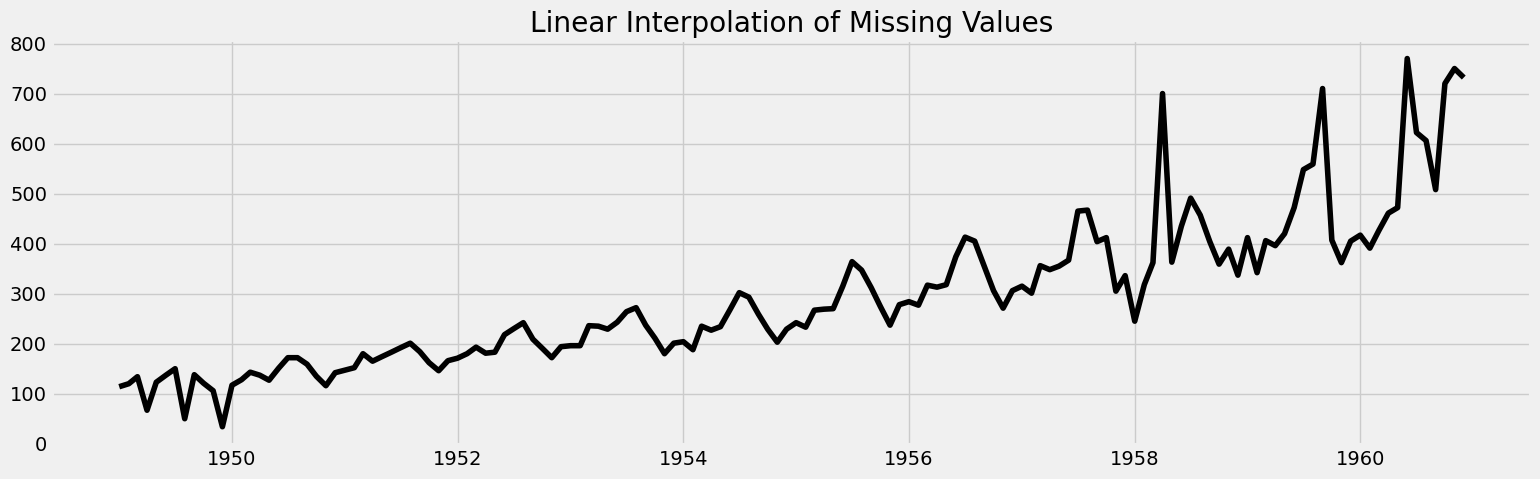

In [10]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()

In [11]:
data['Customers'] = data['Customers_linear']

In [12]:
data.isnull().sum()

Customers           0
Customers_linear    0
dtype: int64

## Outliers Treatment

In [13]:
# outliers treatment

data['Customers_linear'].loc[(data['Customers_linear']>=700)] = 622
# lets also check the null values again
data.isnull().sum()

Customers           0
Customers_linear    0
dtype: int64

## Time Series Decomposition

In [14]:
import statsmodels.api as sm

### Additive Seasonal Decomposition

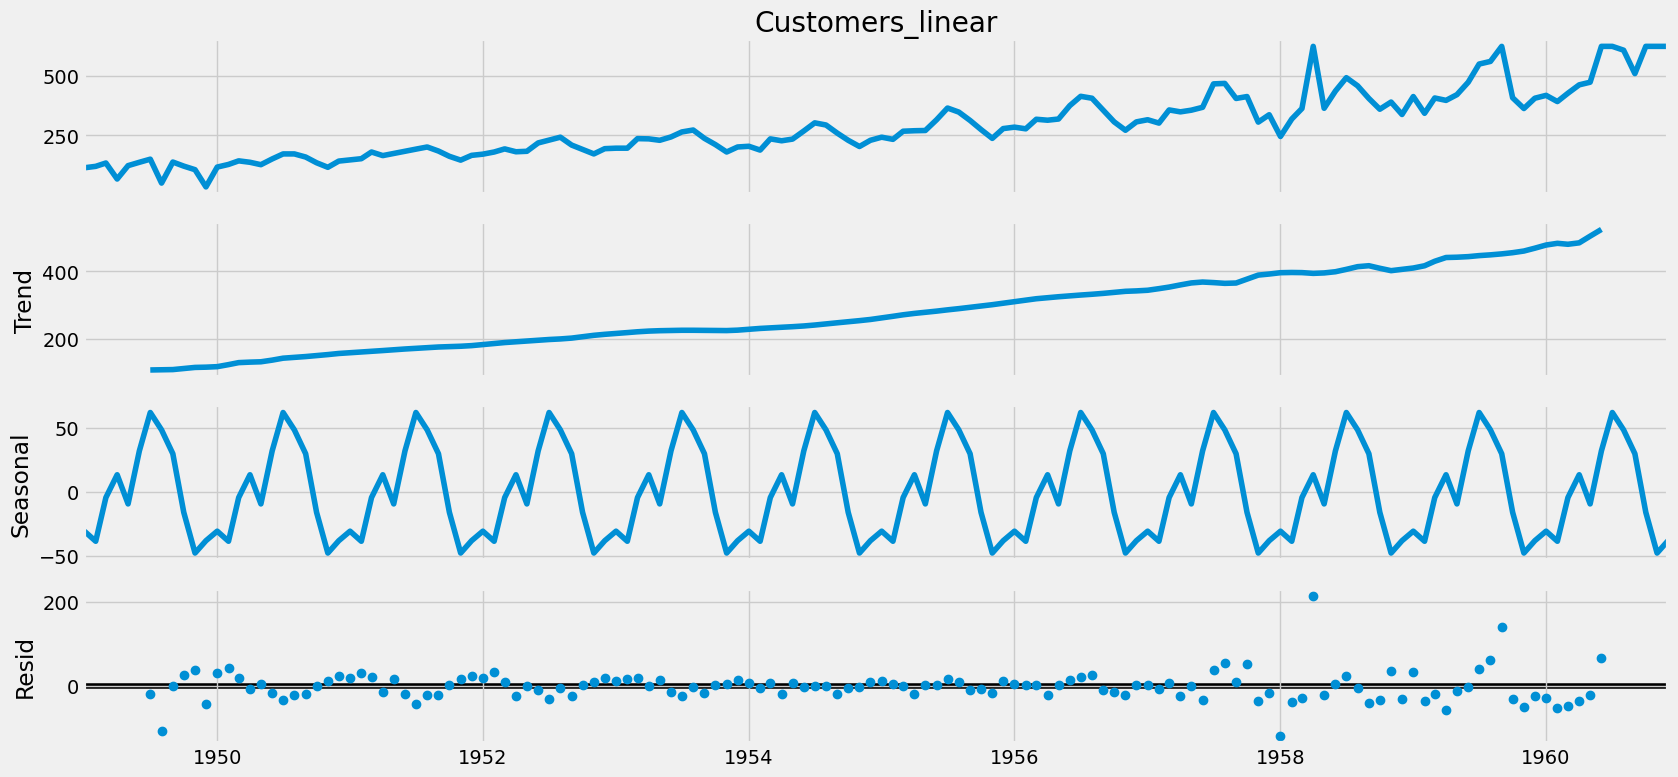

In [15]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='additive')
decomposition.plot()
                                          
plt.show()

### Multiplicative Seasonal Decomposition

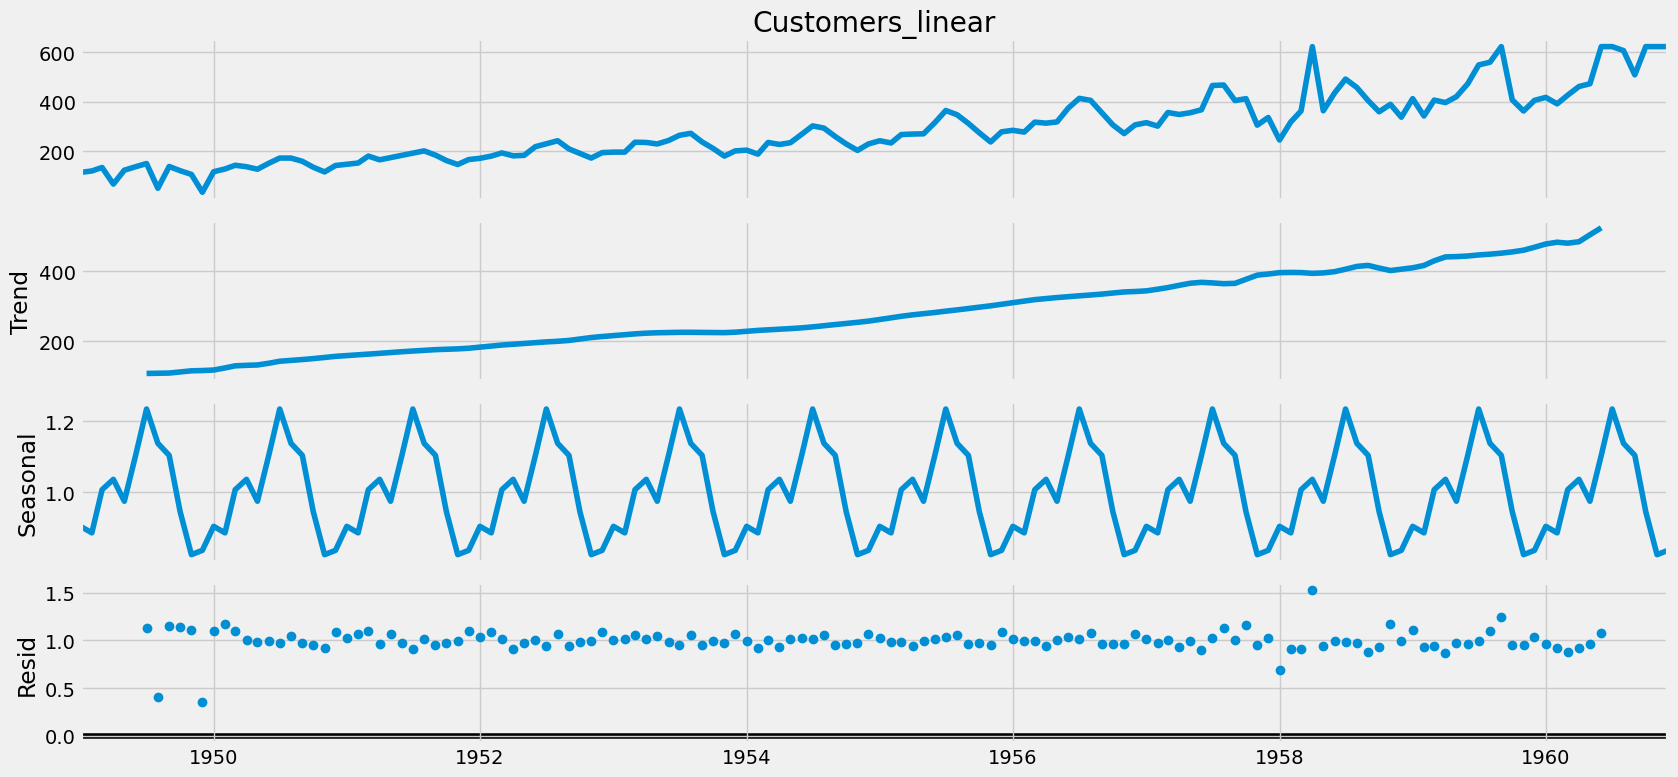

In [16]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='multiplicative')
fig = decomposition.plot()
plt.show()

## Splitting Train and Test data

In [17]:
length_train = 115
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]

In [18]:
# lets check the shape of train

print(train.shape)
train.tail()

(115, 2)


,Customers,Customers_linear
Date,,
1958-03-01,362.0,362.0
1958-04-01,700.0,622.0
1958-05-01,363.0,363.0
1958-06-01,435.0,435.0
1958-07-01,491.0,491.0


In [19]:
# lets check the shape of test

print(train.shape)
test.head()

(115, 2)


,Customers,Customers_linear
Date,,
1958-08-01,457.0,457.0
1958-09-01,404.0,404.0
1958-10-01,359.0,359.0
1958-11-01,389.0,389.0
1958-12-01,337.0,337.0


# Naive Method
The naive method is the simplest method of all forecasting methods. It looks at the last historical data and extrapolates it for all the future values without adjusting or attempting to establish causal factors.

In [21]:
y_naive = test.copy()
y_naive['forecasted_naive'] = train['Customers'][length_train-1]
y_naive['forecasted_naive']

Date
1958-08-01    491.0
1958-09-01    491.0
1958-10-01    491.0
1958-11-01    491.0
1958-12-01    491.0
1959-01-01    491.0
1959-02-01    491.0
1959-03-01    491.0
1959-04-01    491.0
1959-05-01    491.0
1959-06-01    491.0
1959-07-01    491.0
1959-08-01    491.0
1959-09-01    491.0
1959-10-01    491.0
1959-11-01    491.0
1959-12-01    491.0
1960-01-01    491.0
1960-02-01    491.0
1960-03-01    491.0
1960-04-01    491.0
1960-05-01    491.0
1960-06-01    491.0
1960-07-01    491.0
1960-08-01    491.0
1960-09-01    491.0
1960-10-01    491.0
1960-11-01    491.0
1960-12-01    491.0
Name: forecasted_naive, dtype: float64

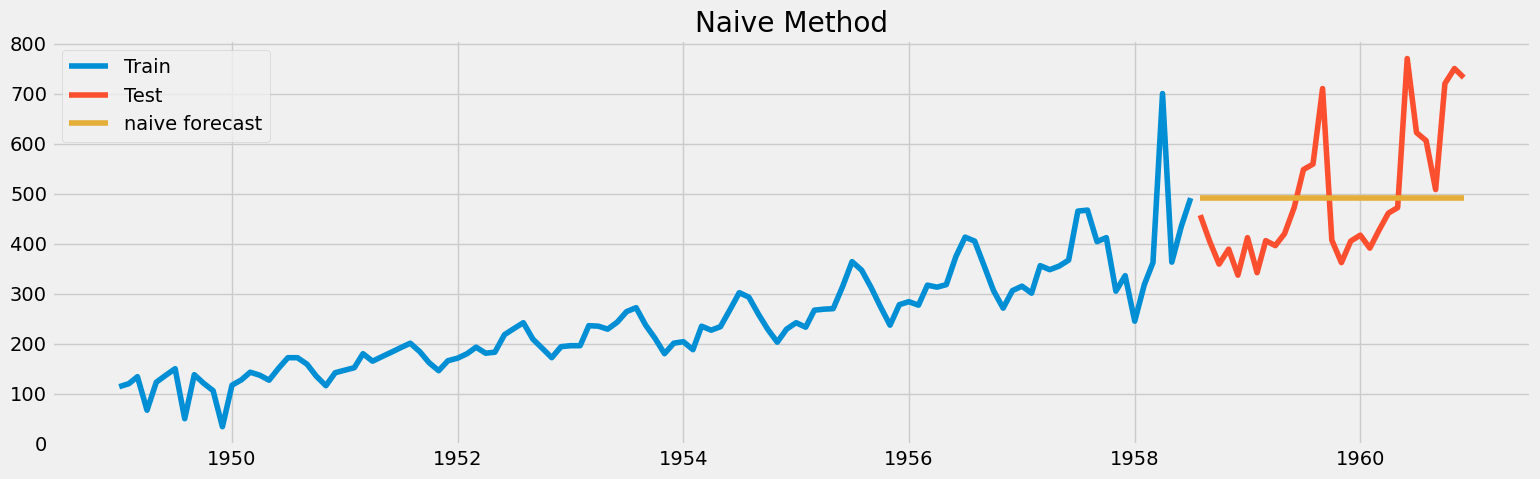

In [22]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_naive['forecasted_naive'], label = 'naive forecast')

plt.legend()
plt.title('Naive Method')
plt.show()

# Simple Average Method
In this method, we take the future predictions equal to the average of all the historical data.

In [25]:
y_avg = test.copy()

y_avg['forecasted_avg'] = train['Customers'].mean()
y_avg['forecasted_avg']

Date
1958-08-01    240.626087
1958-09-01    240.626087
1958-10-01    240.626087
1958-11-01    240.626087
1958-12-01    240.626087
1959-01-01    240.626087
1959-02-01    240.626087
1959-03-01    240.626087
1959-04-01    240.626087
1959-05-01    240.626087
1959-06-01    240.626087
1959-07-01    240.626087
1959-08-01    240.626087
1959-09-01    240.626087
1959-10-01    240.626087
1959-11-01    240.626087
1959-12-01    240.626087
1960-01-01    240.626087
1960-02-01    240.626087
1960-03-01    240.626087
1960-04-01    240.626087
1960-05-01    240.626087
1960-06-01    240.626087
1960-07-01    240.626087
1960-08-01    240.626087
1960-09-01    240.626087
1960-10-01    240.626087
1960-11-01    240.626087
1960-12-01    240.626087
Name: forecasted_avg, dtype: float64

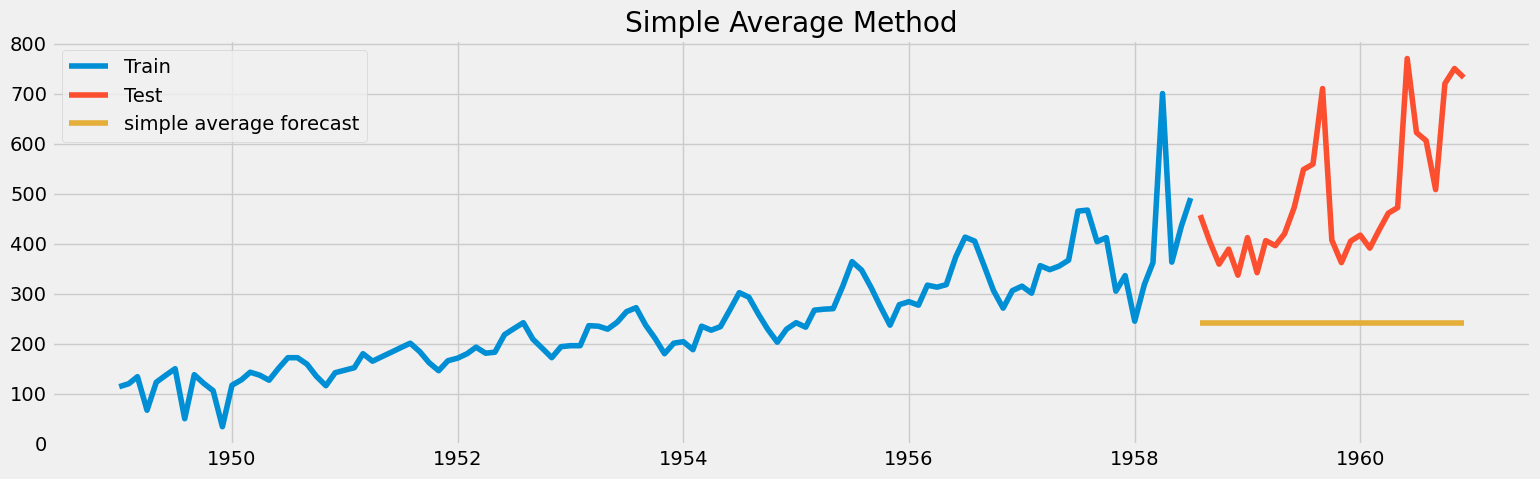

In [26]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_avg['forecasted_avg'], label = 'simple average forecast')

plt.legend()
plt.title('Simple Average Method')
plt.show()

In [27]:
mfe = np.round(np.mean(test['Customers']-y_avg['forecasted_avg']),2)
mfe

251.1

In [28]:
mae = np.round(np.mean(np.abs(test['Customers']-y_avg['forecasted_avg'])),2)
mae

251.1

In [29]:
mape = np.round(np.mean(np.abs(test['Customers']-y_avg['forecasted_avg'])/test['Customers'])*100,2)
mape

47.94

# Simple Moving Average Method
In this method, we take the future predictions equal to the average of a moving window. A window can be a time period of 3 months, 6 months, 9 months or 1 year.

In [22]:
y_moving = data.copy()

window = 9
y_moving["moving_average_forecast"] = data['Customers'].rolling(window).mean()
y_moving['moving_average_forecast'][length_train:] = y_moving['moving_average_forecast'][length_train-1]


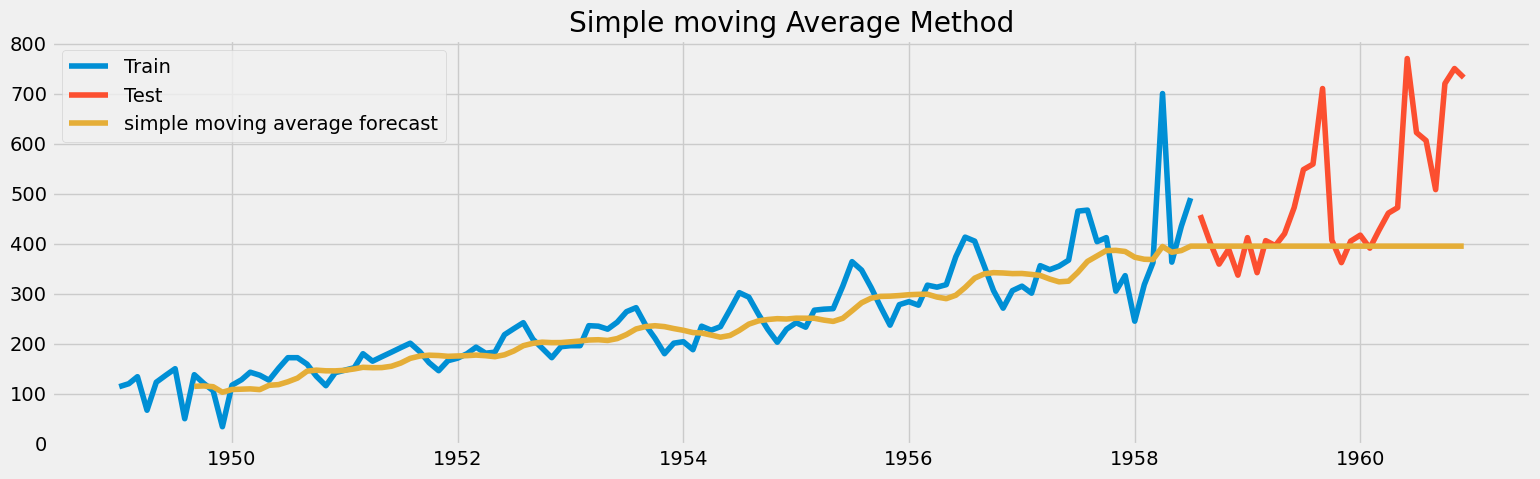

In [23]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_moving['moving_average_forecast'], label = 'simple moving average forecast')

plt.legend()
plt.title('Simple moving Average Method')
plt.show()